<a href="https://colab.research.google.com/github/zoro-21/Analytical/blob/main/HR_Datastratgies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3# HR Data Analysis


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

**Data Cleaning**

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Store the  data
employee_attrition_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
employee_attrition_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_attrition_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#Creating a Dataframe containing the datatype, count,number of unique values,
#sum of the null values and sum of the duplicates in each column
list=[]
for col in employee_attrition_data.columns:
        columns = employee_attrition_data.columns
        dtype = employee_attrition_data[col].dtypes
        instances = employee_attrition_data[col].count()
        unique = employee_attrition_data[col].nunique()
        sum_null = employee_attrition_data[col].isnull().sum()
        duplicates = employee_attrition_data[col].duplicated().sum()
        list.append([dtype,instances,unique,sum_null,duplicates])
data_check = pd.DataFrame(list,columns=["dtype","instances","unique","sum_null","duplicates"],index=employee_attrition_data.columns)
data_check

,dtype,instances,unique,sum_null,duplicates
Age,int64,1470,43,0,1427
Attrition,object,1470,2,0,1468
BusinessTravel,object,1470,3,0,1467
DailyRate,int64,1470,886,0,584
Department,object,1470,3,0,1467
DistanceFromHome,int64,1470,29,0,1441
Education,int64,1470,5,0,1465
EducationField,object,1470,6,0,1464
EmployeeCount,int64,1470,1,0,1469
EmployeeNumber,int64,1470,1470,0,0


In [ ]:
# Unique values present in each Column
unique_values_df = pd.DataFrame(columns=['Column', 'Unique_Values'])
for column in employee_attrition_data.columns:
    unique_values = employee_attrition_data[column].unique()
    unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
unique_values_df

<ipython-input-6-214ef48441e2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-6-214ef48441e2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-6-214ef48441e2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  unique_values_df = unique_values_df.append({'Column': column, 'Unique_Values': unique_values}, ignore_index=True)
<ipython-input-6-214ef48441e2>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.

,Column,Unique_Values
0,Age,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,"[Yes, No]"
2,BusinessTravel,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,"[2, 1, 4, 3, 5]"
7,EducationField,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,[1]
9,EmployeeNumber,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


In [ ]:
# Dropping Columns
# EmployeeCount,Over18 and standardhaours have only one value
# EmployeeNumber is not usefull for analysis
# Preformance Rating has only 2 values
employee_attrition_data.drop(['EmployeeCount','EmployeeNumber','StandardHours','Over18','PerformanceRating'],axis=1,inplace=True)

In [ ]:
employee_attrition_data.shape

(1470, 30)

**Data Visualization**

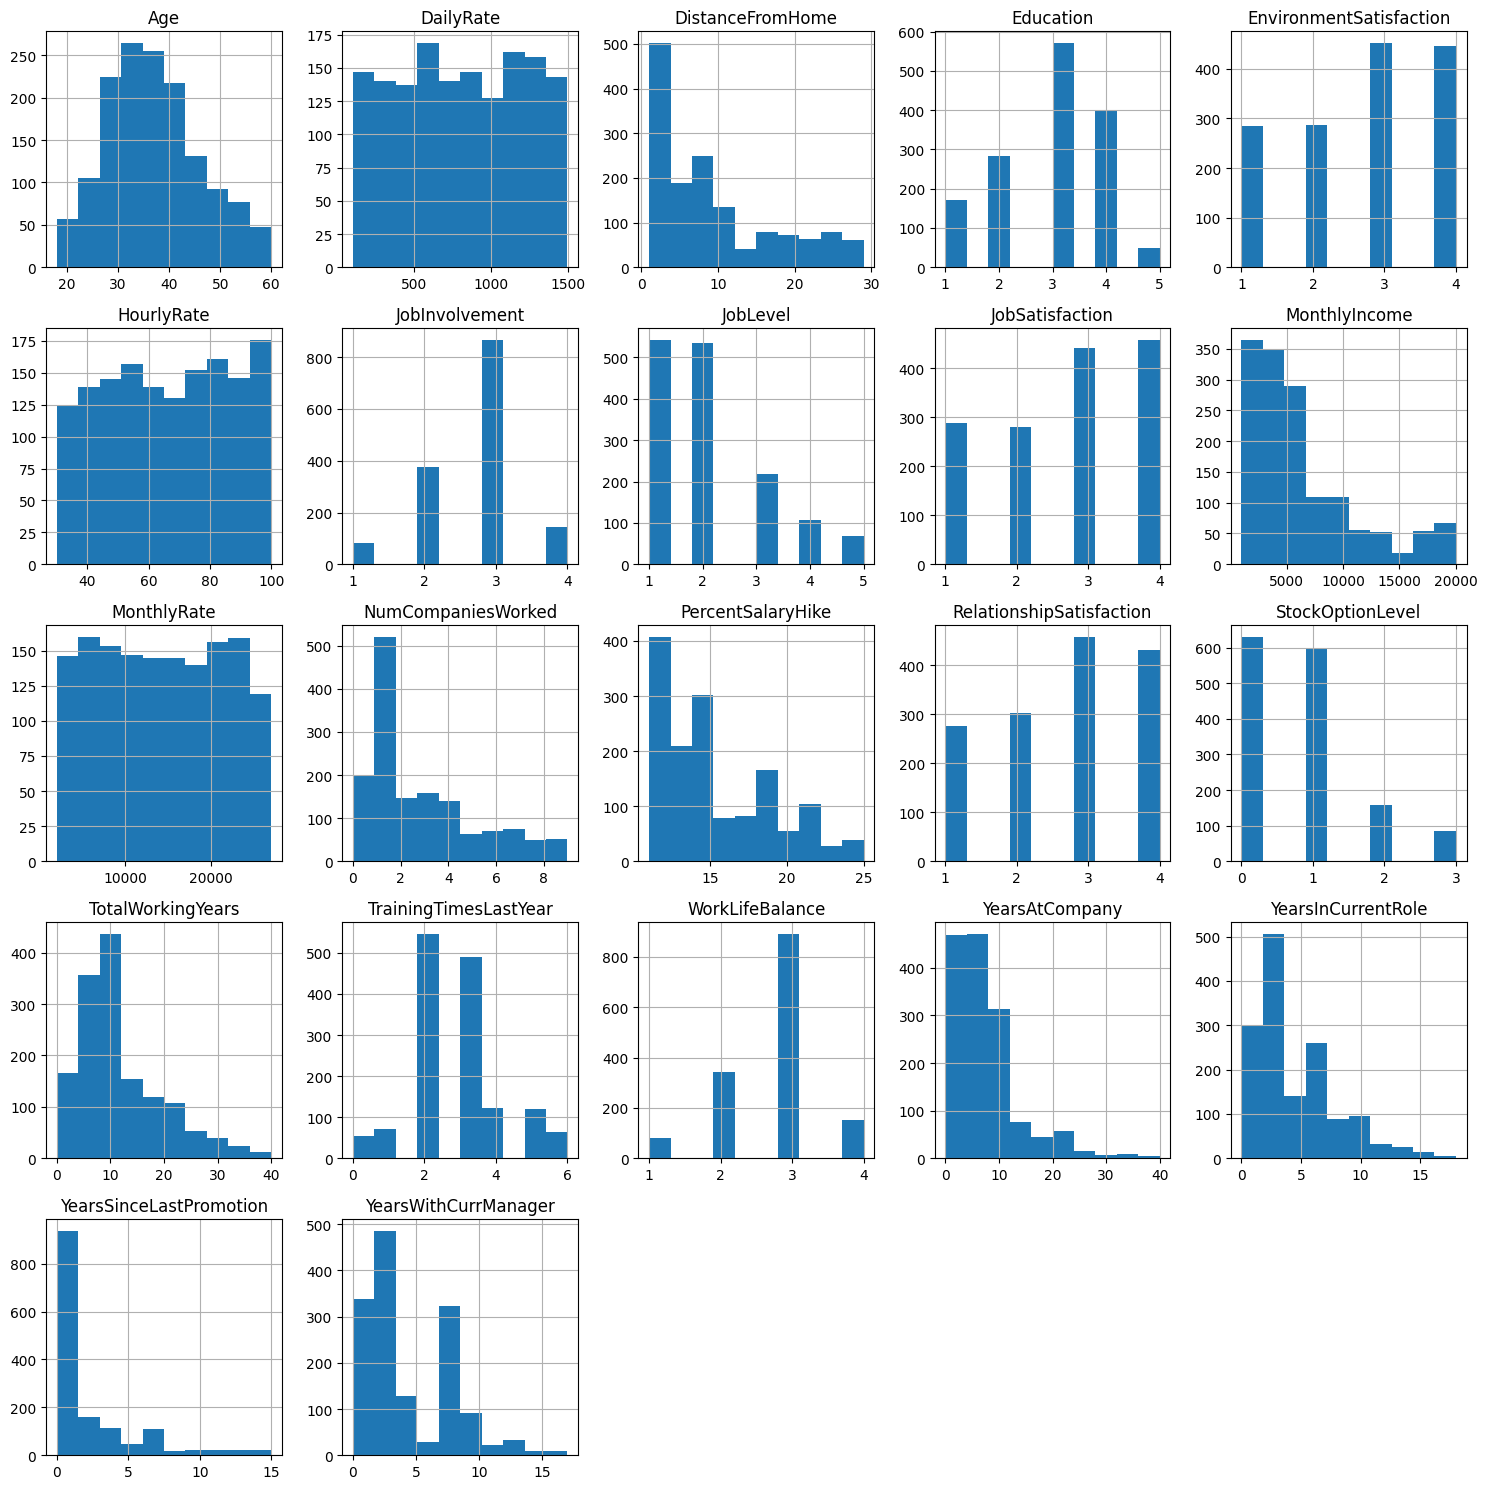

In [ ]:
# let's Visualizes the data
employee_attrition_data.hist(figsize=(15,15))
plt.tight_layout()
plt.show()

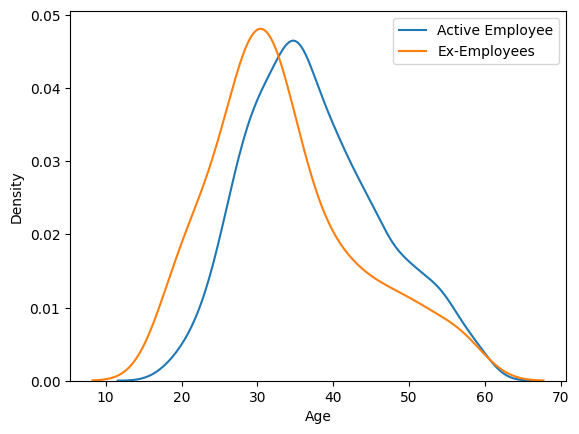

In [ ]:
# Explore the age differnce between ex employees vs present employees

sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.kdeplot(employee_attrition_data.loc[employee_attrition_data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')

plt.legend()
plt.show()

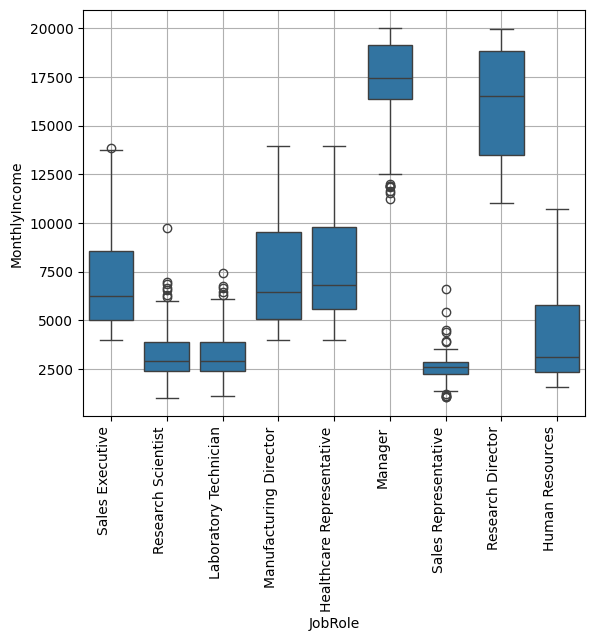

In [ ]:
# See wheather "salary" palys a vital role in 'Attrition':
sns.boxplot(y=employee_attrition_data["MonthlyIncome"], x= employee_attrition_data["JobRole"])
plt.grid(True, alpha=1)
plt.tight_layout()
plt.xticks(rotation=90, ha='right')
plt.show()

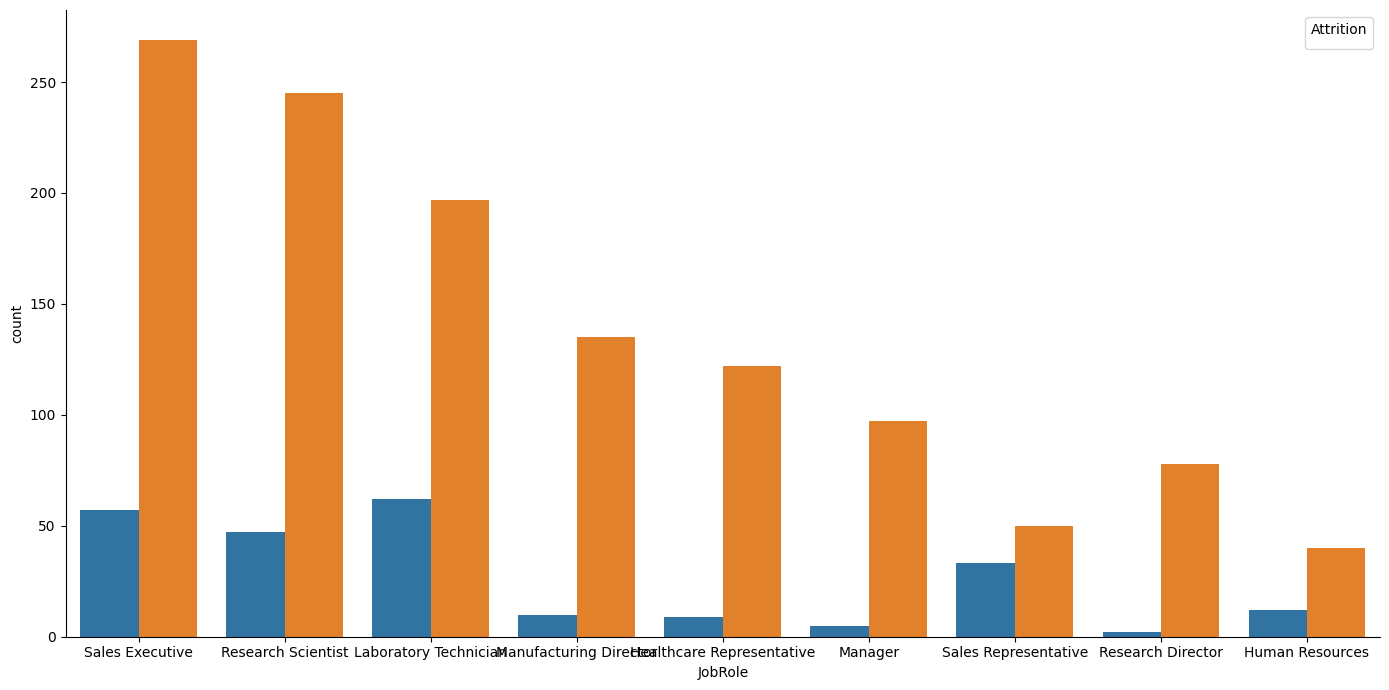

In [ ]:
# Check the attrition amomng the different deppartments
sns.catplot(x='JobRole', hue='Attrition', data=employee_attrition_data, kind="count", height=7, aspect=2, legend=False)
plt.legend(loc='upper right', title='Attrition')
plt.tight_layout()
plt.show()

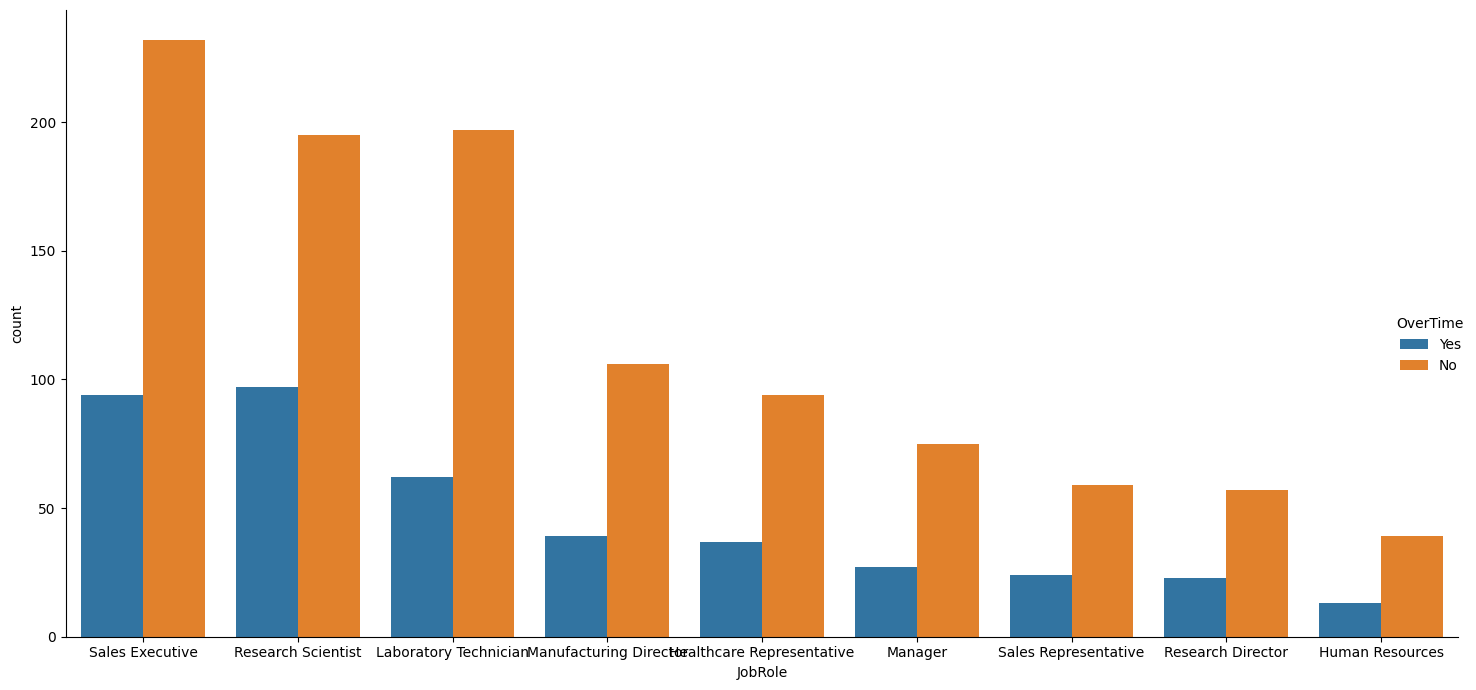

In [ ]:
# let see which departments is highly involved in Overtime:
sns.catplot(x='JobRole', hue='OverTime', data=employee_attrition_data, kind="count", height=7, aspect=2)

plt.tight_layout()
plt.show()

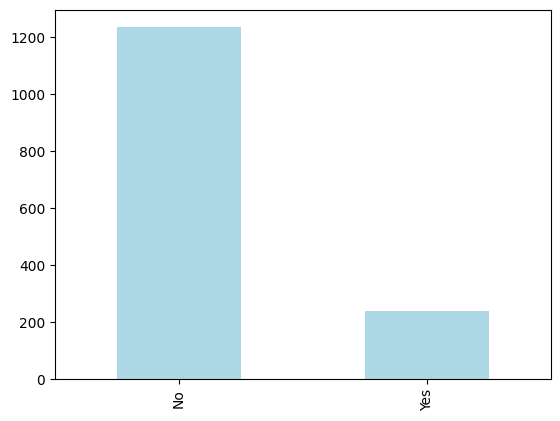

In [ ]:
# check the overall Attrition vs Curent Employeecount:
employee_attrition_data['Attrition'].value_counts().plot(kind='bar', color = '#ADD8E6')
plt.show()

In [ ]:
# let perform the some data type transformation
employee_attrition_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromot

In [ ]:
# convert their  data types  "Object data type to categorial "
for col in employee_attrition_data.columns:
    if employee_attrition_data[col].dtype == 'object':
        employee_attrition_data[col]= employee_attrition_data[col].astype('category')
        employee_attrition_data[col] = employee_attrition_data[col].cat.codes


In [ ]:
employee_attrition_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,11,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,12,4,1,6,3,3,2,2,2,2
5,32,0,1,1005,1,2,2,1,4,1,...,13,3,0,8,2,2,7,7,3,6
6,59,0,2,1324,1,3,3,3,3,0,...,20,1,3,12,3,2,1,0,0,0
7,30,0,2,1358,1,24,1,1,4,1,...,22,2,1,1,2,3,1,0,0,0
8,38,0,1,216,1,23,3,1,4,1,...,21,2,0,10,2,3,9,7,1,8
9,36,0,2,1299,1,27,3,3,3,1,...,13,2,2,17,3,2,7,7,7,7


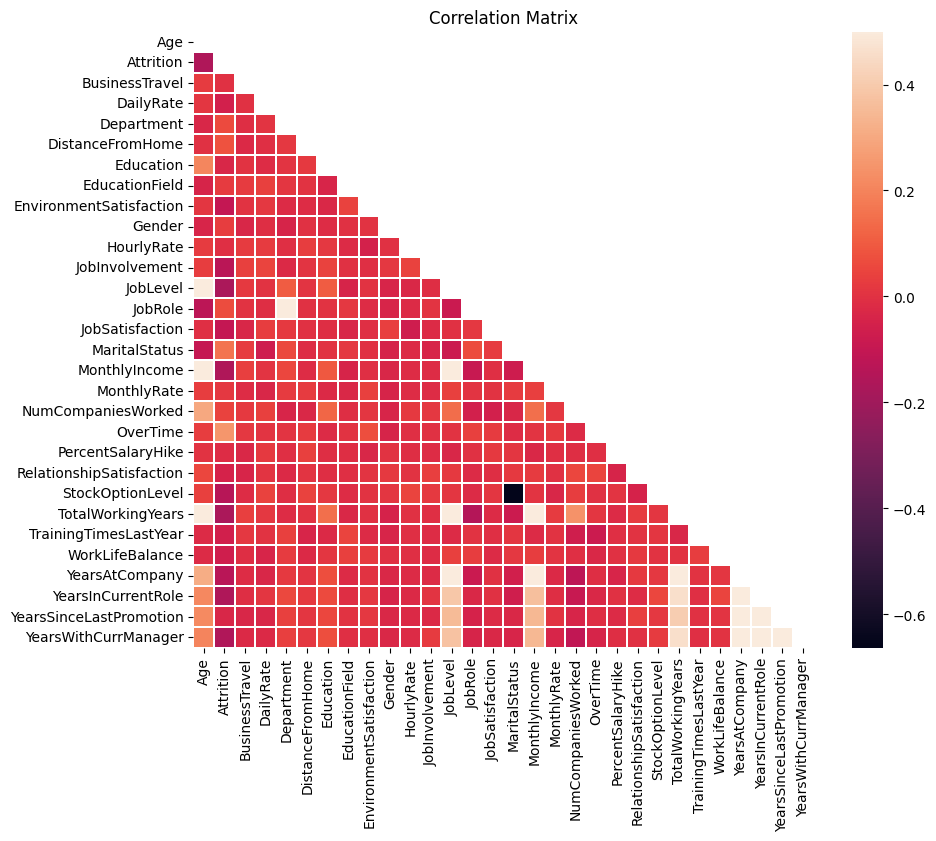

In [ ]:
# visualize the correlation matrix

corr = employee_attrition_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, vmax=.5, mask=mask, linewidths=.2)
plt.title('Correlation Matrix')
plt.show()

 **EDA AND VISUALIZATION**


Distribution analysis

Hypothesis testing

Bivariate analysis

Multivariate analysis

3D Visualization

                  


In [ ]:
from scipy import stats
from tabulate import tabulate
import pandas as pd

In [ ]:
# Distribution analysis
print("\nDistribution Analysis:")
distribution_results = []

numerical_columns = employee_attrition_data.select_dtypes(include=['int64']).columns
for column in numerical_columns:
    skewness = employee_attrition_data[column].skew()
    kurtosis = employee_attrition_data[column].kurtosis()
    distribution_results.append({'Column': column, 'Skewness': skewness, 'Kurtosis': kurtosis})

# Create a DataFrame from the results
distribution_df = pd.DataFrame(distribution_results)

# Display the DataFrame
print(distribution_df)



Distribution Analysis:
                      Column  Skewness  Kurtosis
0                        Age  0.413286 -0.404145
1                  DailyRate -0.003519 -1.203823
2           DistanceFromHome  0.958118 -0.224833
3                  Education -0.289681 -0.559115
4    EnvironmentSatisfaction -0.321654 -1.202521
5                 HourlyRate -0.032311 -1.196398
6             JobInvolvement -0.498419  0.270999
7                   JobLevel  1.025401  0.399152
8            JobSatisfaction -0.329672 -1.222193
9              MonthlyIncome  1.369817  1.005233
10               MonthlyRate  0.018578 -1.214956
11        NumCompaniesWorked  1.026471  0.010214
12         PercentSalaryHike  0.821128 -0.300598
13  RelationshipSatisfaction -0.302828 -1.184814
14          StockOptionLevel  0.968980  0.364634
15         TotalWorkingYears  1.117172  0.918270
16     TrainingTimesLastYear  0.553124  0.494993
17           WorkLifeBalance -0.552480  0.419460
18            YearsAtCompany  1.764529  3.935

In [ ]:
# Hypothesis testing
attrition_yes = employee_attrition_data[employee_attrition_data['Attrition'] == 'Yes']
attrition_no = employee_attrition_data[employee_attrition_data['Attrition'] == 'No']
t_stat, p_value = stats.ttest_ind(attrition_yes['MonthlyIncome'], attrition_no['MonthlyIncome'])

# Create a table
results = [
    ["T-statistic", t_stat],
    ["P-value", p_value]
]

# Print the table
print("\nHypothesis Testing:")
print(tabulate(results, headers=["Test Statistic", "P-value"], tablefmt="pretty"))


Hypothesis Testing:
+----------------+---------+
| Test Statistic | P-value |
+----------------+---------+
|  T-statistic   |   nan   |
|    P-value     |   nan   |
+----------------+---------+


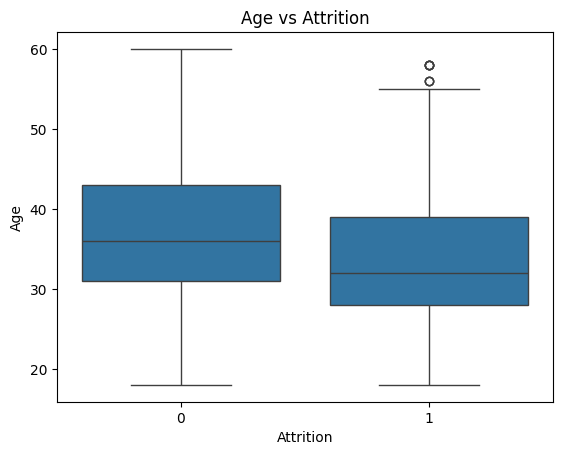

In [ ]:
#Bivariate Analysis: Explore relationships between pairs of variables
# Relationship between Age and Attrition

sns.boxplot(x='Attrition', y='Age', data=employee_attrition_data)
plt.title('Age vs Attrition')
plt.show()


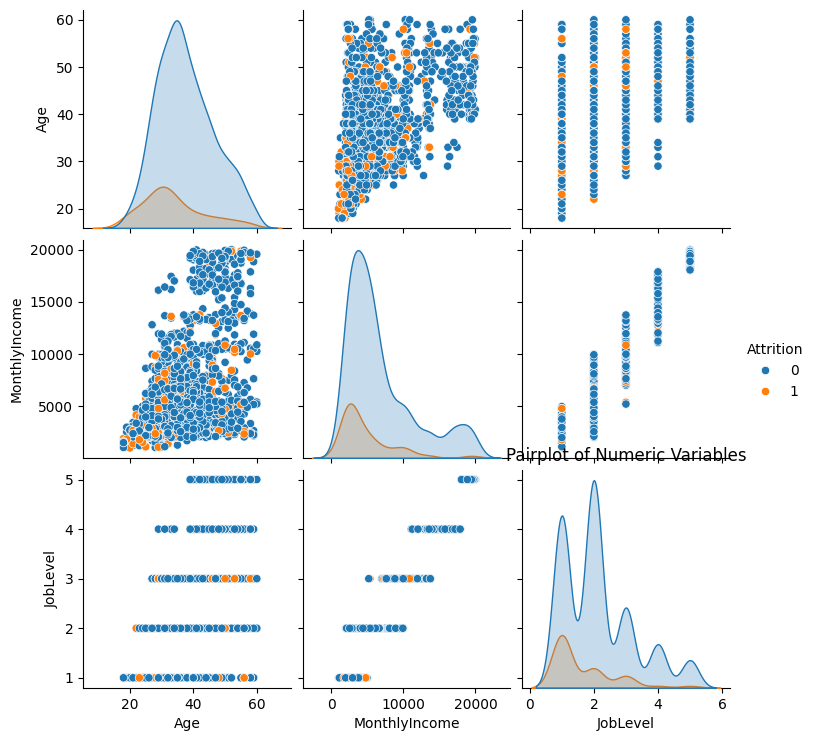

In [ ]:
#Multivariate Analysis: Explore relationships between multiple variables
# Pairplot of Numeric Variables
sns.pairplot(employee_attrition_data[['Age', 'MonthlyIncome', 'JobLevel', 'Attrition']], hue='Attrition')
plt.title('Pairplot of Numeric Variables')
plt.show()

In [ ]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
import plotly.graph_objects as go

# Defining a color map for Attrition categories
color_map = {'Yes': 'rgb(255,0,0)', 'No': 'rgb(0,255,0)'}

fig = go.Figure(data=[go.Scatter3d(
    x=employee_attrition_data['Age'],
    y=employee_attrition_data['MonthlyIncome'],
    z=employee_attrition_data['TotalWorkingYears'],
    mode='markers',
    marker=dict(
        size=5,
        color=employee_attrition_data['Attrition'].map(color_map),  # Mapping Attrition to colors using the color map
        opacity=0.8
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Monthly Income',
                    zaxis_title='Total Working Years'),
                  title='3D Scatter Plot of Age, Monthly Income, and Total Working Years',
                  margin=dict(l=0, r=0, b=0, t=40))
fig.show()


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Bar(
    x=employee_attrition_data['JobRole'],
    y=employee_attrition_data['MonthlyIncome'],
    marker=dict(
        color='rgb(255,140,0)',
        opacity=0.7
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Job Role',
                    yaxis_title='Monthly Income'),
                  title='3D Bar Plot of Job Role and Monthly Income',
                  margin=dict(l=0, r=0, b=0, t=40))
fig.show()


In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=employee_attrition_data['YearsAtCompany'],
    y=employee_attrition_data['YearsInCurrentRole'],
    z=employee_attrition_data['YearsSinceLastPromotion'],
    mode='lines',
    marker=dict(
        color='rgb(0,191,255)',
        opacity=0.7
    )
)])

fig.update_layout(scene=dict(
                    xaxis_title='Years at Company',
                    yaxis_title='Years in Current Role',
                    zaxis_title='Years Since Last Promotion'),
                  title='3D Line Plot of Years at Company, Years in Current Role, and Years Since Last Promotion',
                  margin=dict(l=0, r=0, b=0, t=40))
fig.show()


In [ ]:
import plotly.express as px

# Pie chart for Attrition
attrition_pie = px.pie(employee_attrition_data, names='Attrition', title='Attrition Distribution')

# Pie chart for Department
department_pie = px.pie(employee_attrition_data, names='Department', title='Department Distribution')

# Pie chart for Education Field
education_field_pie = px.pie(employee_attrition_data, names='EducationField', title='Education Field Distribution')

# Display the pie charts
attrition_pie.show()
department_pie.show()
education_field_pie.show()


statiscal analysis


0    1233
1     237
Name: Attrition, dtype: int64
2    1043
1     277
0     150
Name: BusinessTravel, dtype: int64
1    961
2    446
0     63
Name: Department, dtype: int64
1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64
1    882
0    588
Name: Gender, dtype: int64


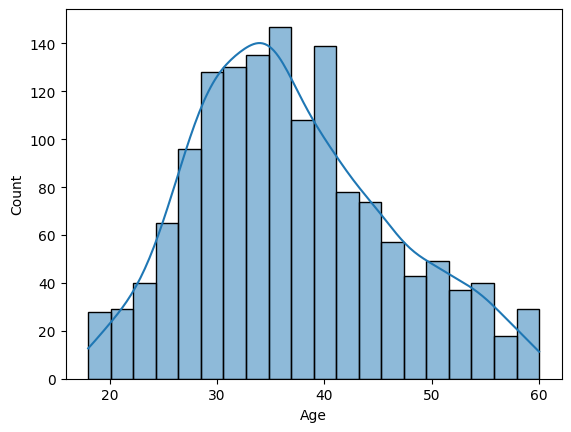

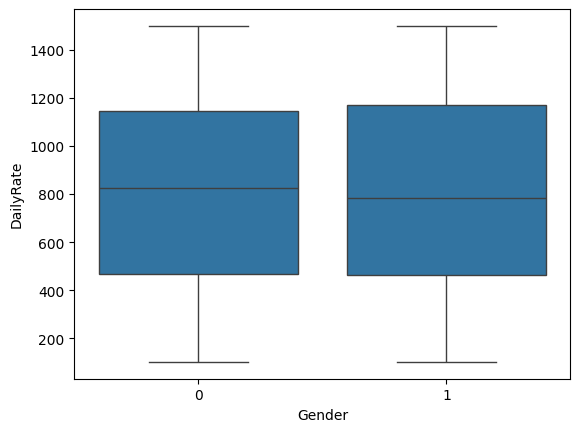

In [ ]:
#statiscal analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# 1. Descriptive Statistics
summary_stats = employee_attrition_data.describe()

# 2. Categorical Variables
categorical_variables = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender']
for var in categorical_variables:
    print(employee_attrition_data[var].value_counts())

# 3. Correlation Analysis
correlation_matrix = employee_attrition_data.corr()

# 4. Chi-square Test
chi2, p, _, _ = chi2_contingency(pd.crosstab(employee_attrition_data['Attrition'], employee_attrition_data['Gender']))

# 5. T-Test
t_test_result = employee_attrition_data.groupby('Gender')['DailyRate'].apply(lambda x: x.values)

# 6. Logistic Regression
# Assuming 'Attrition' is the dependent variable
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = employee_attrition_data[['Age', 'DailyRate', 'YearsAtCompany']]  # Add relevant independent variables
y = employee_attrition_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

# 7. Data Visualization
sns.histplot(employee_attrition_data['Age'], bins=20, kde=True)
plt.show()
sns.boxplot(x='Gender', y='DailyRate', data=employee_attrition_data)
plt.show()


# Machine Learning
  

In [ ]:
display(employee_attrition_data.head(3))

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,...,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,...,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,...,15,2,0,7,3,3,0,0,0,0


In [ ]:
employee_attrition_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int8 
 2   BusinessTravel            1470 non-null   int8 
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   int8 
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   int8 
 8   EnvironmentSatisfaction   1470 non-null   int64
 9   Gender                    1470 non-null   int8 
 10  HourlyRate                1470 non-null   int64
 11  JobInvolvement            1470 non-null   int64
 12  JobLevel                  1470 non-null   int64
 13  JobRole                   1470 non-null   int8 
 14  JobSatisfaction           1470 non-null 

In [ ]:
attrition_yes_count = employee_attrition_data['Attrition'].value_counts()['Yes'] #This indicates that an employee has left the organization due to one of the reasons mentioned above.
attrition_no_count = employee_attrition_data['Attrition'].value_counts()['No'] #This indicates that an employee is still active and has not left the organization.

print("Yes:", attrition_yes_count)
print("No: ", attrition_no_count)

Yes: 237
No:  1233


In [ ]:
'''
The result indicates that out of the total employees in the dataset:
- 237 employees have left the organization.
- 1233 employees are still active in the organization.

so 237 can be high or low depending on the situation but dunno, feels high
'''

<ipython-input-45-8f743d1ed78b>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




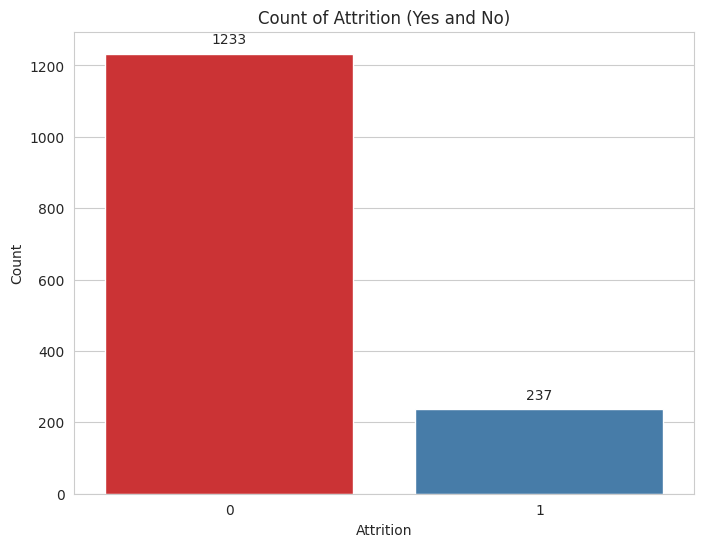

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Attrition', data=employee_attrition_data, palette='Set1')
plt.title('Count of Attrition (Yes and No)')
plt.xlabel('Attrition')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

plt.show()

In [ ]:
employee_attrition_data['Department'].unique()

array([2, 1, 0], dtype=int8)

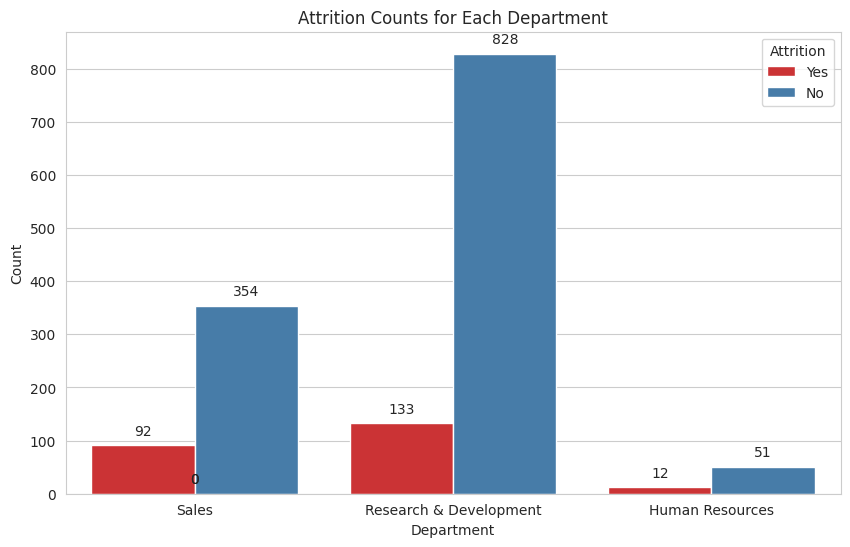

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Department', hue='Attrition', data=employee_attrition_data, palette='Set1')
plt.title('Attrition Counts for Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Attrition', loc='upper right')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')


plt.show()

In [ ]:
attrition_counts = employee_attrition_data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
print("Attrition Counts for Each Department:")
print(attrition_counts)

Attrition Counts for Each Department:
Attrition     0    1
Department          
0            51   12
1           828  133
2           354   92


In [ ]:
'''
HR: Shows relatively low attrition (12 out of 63), suggesting effective retention strategies or a positive work environment.
Research & Development: Exhibits a higher attrition rate (133 out of 961), indicating potential challenges in retaining talent critical for innovation.
Sales: Demonstrates an intermediate attrition rate (92 out of 446), requiring attention to maintain sales operations and team motivation.
'''

In [ ]:
print(employee_attrition_data['MonthlyIncome'].min())
print(employee_attrition_data['MonthlyIncome'].max())

1009
19999


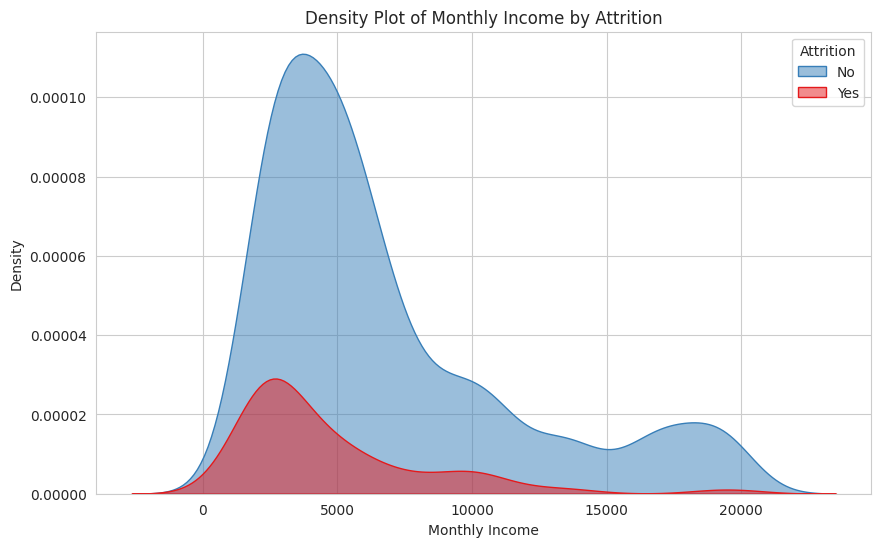

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.kdeplot(data=employee_attrition_data, x='MonthlyIncome', hue='Attrition', fill=True, palette='Set1', alpha=0.5)
plt.title('Density Plot of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')
plt.legend(title='Attrition', labels=['No', 'Yes'])
plt.show()

In [ ]:
'''
From graph we can comapratively higher attrition rate b/w 0-5000 monthly income
'''

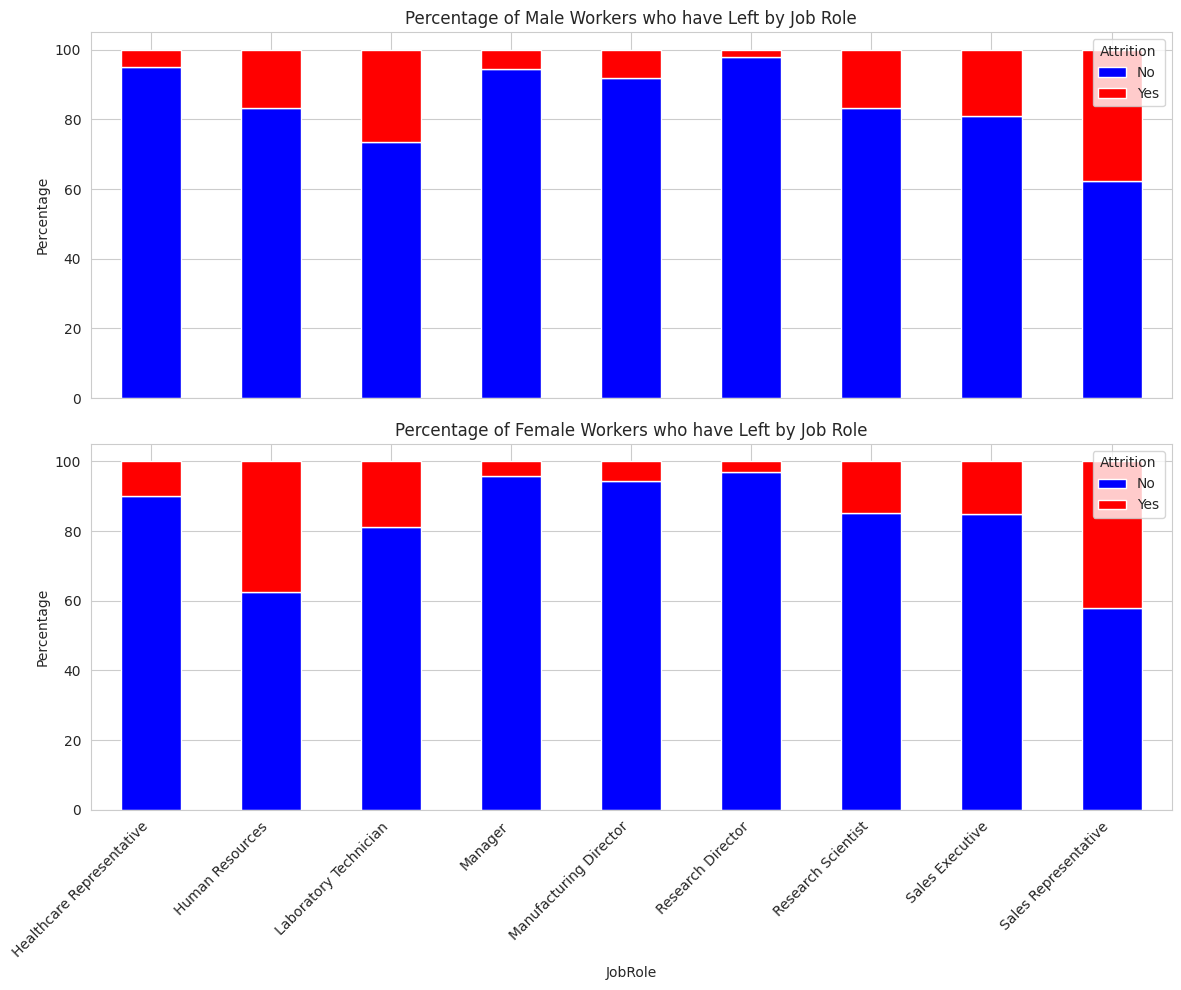

In [ ]:
male_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Male']
female_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Female']

male_counts = male_data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
female_counts = female_data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)

male_counts = male_counts[['No', 'Yes']]
female_counts = female_counts[['No', 'Yes']]

male_totals = male_counts.sum(axis=1)
female_totals = female_counts.sum(axis=1)
male_percentages = male_counts.div(male_totals, axis=0) * 100
female_percentages = female_counts.div(female_totals, axis=0) * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Male graph
male_percentages.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[0])
axes[0].set_title('Percentage of Male Workers who have Left by Job Role')
axes[0].set_ylabel('Percentage')
axes[0].legend(title='Attrition', loc='upper right')

# Female graph
female_percentages.plot(kind='bar', stacked=True, color=['blue', 'red'], ax=axes[1])
axes[1].set_title('Percentage of Female Workers who have Left by Job Role')
axes[1].set_ylabel('Percentage')
axes[1].legend(title='Attrition', loc='upper right')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
'''
From above fraph i see higher attrition % in:
- Sales representative both Male and Female
- Female HR job role

somewhat of intermediate in Laboratory Technician role in both or 20+% could be higher
'''

In [ ]:
'''
Also from the Multivariate Analysis very above i can see ppl leaving the company at earlier age, job roles and income
'''

# Real ML part starts here

## Logistic regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
X = employee_attrition_data.drop('Attrition', axis=1)
y = employee_attrition_data['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
numerical_features = X.select_dtypes(include=['int64']).columns
numerical_transformer = StandardScaler()

categorical_features = X.select_dtypes(include=['object']).columns
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
logistic_model = LogisticRegression(random_state=42)

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', logistic_model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8809523809523809


In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93       255
           1       0.64      0.23      0.34        39

    accuracy                           0.88       294
   macro avg       0.77      0.61      0.64       294
weighted avg       0.86      0.88      0.86       294



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[245  10]
 [ 22  17]]


In [ ]:
'''
if someone dont understand dont worry will explain the results in the meet, bcoz theoritically i dont wanna write para explaining
'''

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])


In [ ]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8741496598639455


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[254   1]
 [ 35   4]]


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', SVC(kernel='rbf', random_state=42))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'Tot...ingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('classifier', SVC(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8877551020408163


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.89      1.00      0.94       255
         Yes       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[255   0]
 [ 33   6]]


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', DecisionTreeClassifier(random_state=42))])

pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'RelationshipSatisfaction', 'StockOptionLevel',
       'Tot...TimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object'))])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7721088435374149


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.88      0.86      0.87       255
         Yes       0.18      0.21      0.19        39

    accuracy                           0.77       294
   macro avg       0.53      0.53      0.53       294
weighted avg       0.78      0.77      0.78       294



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[219  36]
 [ 31   8]]


In [ ]:
import plotly.express as px

In [ ]:
# Attrition by Job Satisfaction
fig = px.histogram(employee_attrition_data, x='JobSatisfaction', color='Attrition', title='Attrition by Job Satisfaction',
                   barmode="stack")

percentages = employee_attrition_data.groupby(['JobSatisfaction', 'Attrition']).size() / employee_attrition_data.groupby('JobSatisfaction').size() * 100


for satisfaction, attrition, percentage in percentages.reset_index().values:
    if attrition == 'Yes':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage, showarrow=False)
    elif attrition == 'No':
        text = f'{percentage:.2f}%'
        fig.add_annotation(text=text, x=satisfaction, y=percentage + 30, showarrow=False, font={"color":"black"})

fig.update_layout(xaxis_title='Satisfaction Rate',
                  yaxis_title='Number of employees',
                  bargap=0.5,
                  height=400,
                  width=600)


fig.show()

From the above graph we can observe that Job satisfaction rate does not affect attrition

In [ ]:
sats_att=employee_attrition_data.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
fig = px.bar(sats_att, x='EnvironmentSatisfaction', y='Counts', color='Attrition',
             barmode='group', labels={'Counts': 'Number of Employees'},
             title='Environment Satisfaction Level Counts of Employees by Attrition',
             category_orders={'EnvironmentSatisfaction': [1, 2, 3, 4]},
             )

fig.update_layout(height=600, width=800)
fig.show()

In [ ]:

stock_att = employee_attrition_data.groupby(['StockOptionLevel', 'Attrition']).size().reset_index(name='Counts')

fig = px.bar(stock_att, x='StockOptionLevel', y='Counts', color='Attrition',
             title='Stock facilities level wise People in an Organization',
             height=600, width=600)
fig.show()

People with 0 or 1 stock level options are more likely to leave

In [ ]:
hike_att=employee_attrition_data.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization',height =600,width =800)

The above graph shos that the chances of an employee leaving the organization where the hike is lower is much more than when it is higher

In [ ]:

fig = px.box(employee_attrition_data, x='Attrition', y='YearsSinceLastPromotion',
             title='Relationship between Attrition and Years Since Last Promotion')

fig.update_layout(xaxis_title='Attrition',
                  yaxis_title='Years Since Last Promotion',height =600,width =800)

fig.show()

In [ ]:
plot = employee_attrition_data.groupby(['NumCompaniesWorked', 'Attrition']).size().reset_index(name='Counts')

fig = px.bar(plot, x='NumCompaniesWorked', y='Counts', color='Attrition',
             barmode='stack', labels={'Counts': 'Counts', 'NumCompaniesWorked': 'Number of Companies Worked'},
             title='Counts of Employees by Number of Companies Worked and Attrition Status',
             category_orders={'Attrition': ['No', 'Yes']})

fig.show()


employees who started their career with the company or have switched to the company in the initial years of their career, have a higher chances of leaving the organization to a different company.

In [ ]:
fig = px.histogram(employee_attrition_data, x='DistanceFromHome', color='Attrition', title='AttritionByDistance',
                   barmode="stack")
fig.update_layout(
    xaxis_title='Distance From Home',
    yaxis_title='Number of employees',
    bargap=0.2)
fig.show()

In [ ]:
plot_df = employee_attrition_data.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x='WorkLifeBalance', y='Percent', color='Attrition',
             facet_row='Gender', text='Percent', opacity=0.75, barmode='group',
             category_orders={'Attrition': ['Yes', 'No']},
             )
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside')
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1,ticksuffix = '%')
fig.update_layout(title_text='Attrition Rates by Work Life Balance and Gender',height =850,width =800,
                  xaxis_title='Work Life Balance',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4]),)
fig.show()

Among men the highest attrition rate has occurred in those with the lowest work life balance. Among women the highest attrition rate is with excellent work life balance

In [ ]:
male_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Male']
female_data = employee_attrition_data[employee_attrition_data['Gender'] == 'Female']

fig = px.box(employee_attrition_data, x='WorkLifeBalance', y='MonthlyIncome', color='Gender', notched=True,
             category_orders={'WorkLifeBalance': [1, 2, 3, 4]},
             labels={'MonthlyIncome': 'Monthly Income', 'WorkLifeBalance': 'Work Life Balance'},
             title='Distribution of Monthly Income by Work Life Balance')
fig.update_traces(marker=dict(line=dict(color='rgb(8,48,107)', width=1.5)))
fig.update_layout( xaxis=dict(tickmode='array', tickvals=[1, 2, 3, 4]), height =600,width =800)
fig.show()

Women with lowest work life balance rating has the highest median salary of 5403.5

In [ ]:
job_level = [1,2,3,4,5]
filtered_data = employee_attrition_data[employee_attrition_data['JobLevel'].isin(job_level)]

fig = px.scatter(filtered_data, x='TotalWorkingYears', y='MonthlyIncome', color='JobLevel', size='MonthlyIncome',
                 labels={'TotalWorkingYears': 'Total Working Years', 'MonthlyIncome': 'Monthly Income'},
                 title='Monthly Income vs Total Working Years by Job Level')
fig.show()

monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.